In [1]:
import os
import numpy as np
import cv2
import glob
import pandas as pd
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

100% 185M/185M [00:02<00:00, 72.3MB/s]
100% 185M/185M [00:02<00:00, 67.6MB/s]


In [4]:
from zipfile import ZipFile
file_name = 'az-handwritten-alphabets-in-csv-format.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
df = pd.read_csv('A_Z Handwritten Data.csv' , header = None).sample(frac=1)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
124244,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221423,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
163441,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196863,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68394,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242432,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228700,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307412,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68080,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
x_part = df.iloc[:,1:]
x_part
y_part = df.iloc[:,:1]
y_part = np.array(y_part)
x_part = np.array(x_part)

In [8]:
y_part.shape

(372451, 1)

In [9]:
np.unique(y_part).shape

(26,)

In [10]:
def preprocess(mask):
    # p,q = mask.shape
    # for i in range(p):
    #   for j in range(q):
    #     if mask[i][j]>165.0:
    #       mask[i][j]=255.0
    #     else:
    #       mask[i][j]=0.0 
    return mask

In [11]:
def preprocess2(mask):
    p,q = mask.shape
    for i in range(p):
      for j in range(q):
        if mask[i][j]>165.0:
          mask[i][j]=255.0
        # else:
        #   mask[i][j]=255.0 
        mask[i][j]=255-mask[i][j]
    return mask

In [12]:
x_part = x_part.reshape(x_part.shape[0],28,28,1)


In [13]:
map_p={
    1:'A',
    2:'B',
    3:'C',
    4:'D',
    5:'E',
    6:'F',
    7:'G',
    8:'H',
    9:'I',
    10:'J',
    11:'K',
    12:'L',
    13:'M',
    14:'N',
    15:'O',
    16:'P',
    17:'Q',
    18:'R',
    19:'S',
    20:'T',
    21:'U',
    22:'V',
    23:'W',
    24:'X',
    25:'Y',
    26:'Z',
    27:'1',
    28:'2',
    29:'3',
    30:'4',
    31:'5',
    32:'6',
    33:'7'
}

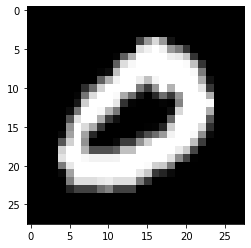

In [14]:
img1 = x_part[20].reshape(28,28)
img1.shape
plt.imshow(img1,cmap='gray')

In [15]:
type(x_part)

numpy.ndarray

In [16]:
np.unique(y_part).shape

(26,)

In [17]:
# np.unique(y_em)

In [18]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten,  GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
import os
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=12, kernel_size=(5,5), strides=2, activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Dropout(.5))
model.add(keras.layers.Conv2D(filters=18, kernel_size=(3,3) , strides=2, activation='relu'))
model.add(keras.layers.Dropout(.5))
model.add(keras.layers.Conv2D(filters=24, kernel_size=(2,2), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=150, activation='relu'))
model.add(keras.layers.Dense(26, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 12)        312       
                                                                 
 dropout (Dropout)           (None, 12, 12, 12)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 18)          1962      
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 18)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 24)          1752      
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 150)               5

In [20]:
# x = x/255.0

In [21]:
x_part.shape

(372451, 28, 28, 1)

In [22]:
x_part=np.array(x_part).astype('float32')
y_part=np.array(y_part).astype('float32')


In [23]:
x_tr, x_ts , y_tr, y_ts = train_test_split(x_part, y_part, test_size=0.33, random_state=42)

In [24]:
history = model.fit(x_tr, y_tr, epochs=7)

Epoch 1/7
7799/7799 [==============================] - 74s 9ms/step - loss: 0.7251 - accuracy: 0.7994
Epoch 2/7
7799/7799 [==============================] - 70s 9ms/step - loss: 0.2873 - accuracy: 0.9136
Epoch 3/7
7799/7799 [==============================] - 71s 9ms/step - loss: 0.2484 - accuracy: 0.9249
Epoch 4/7
7799/7799 [==============================] - 72s 9ms/step - loss: 0.2345 - accuracy: 0.9291
Epoch 5/7
7799/7799 [==============================] - 69s 9ms/step - loss: 0.2260 - accuracy: 0.9312
Epoch 6/7
7799/7799 [==============================] - 69s 9ms/step - loss: 0.2201 - accuracy: 0.9333
Epoch 7/7
7799/7799 [==============================] - 68s 9ms/step - loss: 0.2171 - accuracy: 0.9337


In [25]:
model.evaluate(x_ts,y_ts)

3841/3841 [==============================] - 13s 3ms/step - loss: 0.1184 - accuracy: 0.9643


[0.11836613714694977, 0.9643150568008423]

EMOJI MODEL STARTED


In [26]:
df_t = pd.read_csv('emoji_newaug.csv')

In [27]:
df_t

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7429,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7430,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_x  =df_t.iloc[:,1:]
df_y = df_t.iloc[:,0:1]
df_x = np.array(df_x)
df_y = np.array(df_y)

In [29]:
df_x = df_x.reshape(df_x.shape[0],28,28,1)

In [30]:
np.unique(df_y).shape

(7,)

In [31]:
model_em = keras.models.Sequential()
model_em.add(keras.layers.Conv2D(filters=12, kernel_size=(5,5), strides=2, activation='relu', input_shape=(28,28,1)))
model_em.add(keras.layers.Dropout(.5))
model_em.add(keras.layers.Conv2D(filters=18, kernel_size=(3,3) , strides=2, activation='relu'))
model_em.add(keras.layers.Dropout(.5))
model_em.add(keras.layers.Conv2D(filters=24, kernel_size=(2,2), activation='relu'))
model_em.add(keras.layers.Flatten())
model_em.add(keras.layers.Dense(units=150, activation='relu'))
model_em.add(keras.layers.Dense(7, activation='softmax'))
model_em.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_em.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 12, 12, 12)        312       
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 12)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 5, 5, 18)          1962      
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 18)          0         
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 24)          1752      
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_2 (Dense)             (None, 150)              

In [32]:
x_tr_em, x_ts_em , y_tr_em, y_ts_em = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [33]:
history = model_em.fit(x_tr_em, y_tr_em, epochs=50)

Epoch 1/50
156/156 [==============================] - 2s 9ms/step - loss: 3.4004 - accuracy: 0.2410
Epoch 2/50
156/156 [==============================] - 1s 9ms/step - loss: 1.6753 - accuracy: 0.3592
Epoch 3/50
156/156 [==============================] - 1s 9ms/step - loss: 1.4272 - accuracy: 0.4631
Epoch 4/50
156/156 [==============================] - 1s 9ms/step - loss: 1.2531 - accuracy: 0.5347
Epoch 5/50
156/156 [==============================] - 1s 9ms/step - loss: 1.0719 - accuracy: 0.6141
Epoch 6/50
156/156 [==============================] - 1s 9ms/step - loss: 0.9703 - accuracy: 0.6526
Epoch 7/50
156/156 [==============================] - 1s 9ms/step - loss: 0.8612 - accuracy: 0.6928
Epoch 8/50
156/156 [==============================] - 1s 9ms/step - loss: 0.7663 - accuracy: 0.7239
Epoch 9/50
156/156 [==============================] - 1s 9ms/step - loss: 0.6751 - accuracy: 0.7610
Epoch 10/50
156/156 [==============================] - 1s 9ms/step - loss: 0.6354 - accuracy: 0.7749

In [34]:
model_em.evaluate(x_ts_em,y_ts_em)

77/77 [==============================] - 0s 4ms/step - loss: 0.0796 - accuracy: 0.9735


[0.07963631302118301, 0.9735018610954285]

In [57]:
test_img = cv2.imread("mosaic_img_test.jpg")

In [58]:
test_img = np.array(test_img)
test_img.shape

(721, 1895, 3)

(721, 1895, 3)


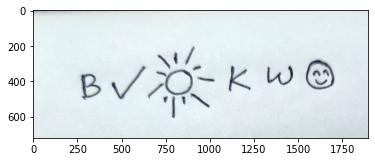

In [59]:
plt.imshow(test_img)
print(test_img.shape)

In [60]:
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)

In [61]:
p,q =test_img.shape
(p,q)
#test_img1 = test_img

(721, 1895)

In [62]:
test_img1 = preprocess2(test_img)


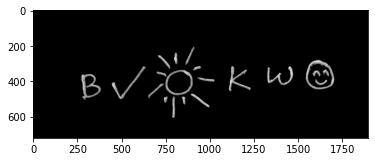

In [63]:
plt.imshow(test_img1,cmap='gray')


In [64]:
def add_border(imgg1):
  colour = [0,0,0]
  constant= cv2.copyMakeBorder(imgg1,50,50,50,50,cv2.BORDER_CONSTANT,value=colour)
  return constant

In [65]:
def segment(img):
  kernel = np.ones((3,3))
  gray_image=img
  lst=[]
  for j in range(gray_image.shape[1]):
    sum = 0
    for i in range(gray_image.shape[0]):
      sum = sum+gray_image[i][j]
    #print(sum)
    lst.append(sum)
  # print(lst)
  rect_x = []
  f = 0
  print(len(lst))
  for i in range(len(lst)):
    if lst[i]>1200 and f==0:
      x1=i
      #print(i)
      f=1
    elif lst[i] ==0 and f==1:
      x2=i
      if(abs(x1-x2)>30):
        rect_x.append((min(x1,x2),max(x1,x2)))
      f=0 
  rect_y=[]
  for x1,x2 in rect_x:
    lst2=[]
    for i in range(gray_image.shape[0]):
      sum=0
      for j in range(min(x1,x2),max(x1,x2)+1):
        sum = sum+gray_image[i][j]
      lst2.append(sum)

    f=0
    for i in range(len(lst2)):
      if lst2[i] >1200 and f==0:
        y1=i
        f=1
      if lst2[i] ==0 and f==1:
        y2=i
        if(abs(y2-y1)>30):
          rect_y.append((min(y1,y2),max(y1,y2)))
          break
        f=0 
  return gray_image, rect_x, rect_y

In [66]:
# plt.imshow(test_img1)

1895
[(273, 385), (447, 638), (653, 1027), (1109, 1232), (1326, 1471), (1544, 1705)]
[(361, 506), (319, 503), (216, 608), (318, 458), (318, 424), (281, 448)]


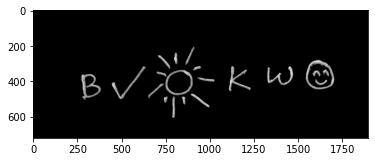

In [67]:
gr_im1,rec_x,rec_y=segment(test_img1)
print(rec_x)
print(rec_y)
plt.imshow(gr_im1,cmap='gray')

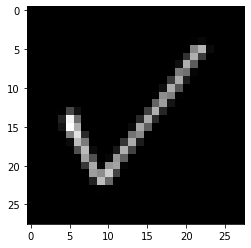

In [70]:
str=""
for i in range(len(rec_x)):
  x1,x2 = rec_x[i]
  y1,y2 = rec_y[i]
  pr_img = test_img1[y1:y2,x1:x2]
  pr_img = add_border(pr_img)
  pr_img = cv2.resize(pr_img,(28,28),interpolation= cv2.INTER_AREA)
  #print(pr_img)
  if i==1:
    plt.imshow(pr_img,cmap='gray')
  pr_img = np.resize(pr_img,(1,28,28))
  #print(pr_img.shape)
  ans1 = model.predict(pr_img)
  ans2= model_em.predict(pr_img)
  max1 = np.max(ans1)
  max2 = np.max(ans2)
  pos1 = np.argmax(ans1,axis=1)
  pos2 = np.argmax(ans2,axis=1)
  #print(pos1)
  ans=-1
  if max1>0.90:
    ans=pos1[0]
  if ans==-1:
    if max1>max2:
      ans = pos1[0]
    else:
      ans = pos2[0]+26
  str=str+map_p[ans+1]

Answer

In [69]:
print(str)

B17KW6


In [47]:
model.save('model_for_alpha_fin.h5')
model_em.save('model_for_emo_fin.h5')